# Bài thực hành tuần 5 - Nhập môn Máy học - Thuật toán K-means

Họ và tên: Huỳnh Quang Trung\
MSSV: 20280108\
Lớp: 20TH_KDL

Bài làm được thực hiện trên Google Colab

-----

Wholesale customers là dataset phục vụ cho bài toán customer segmentation dựa vào một số thông tin và hành vi của khách hàng 
- Đọc dữ liệu
- Trực quan hóa dữ liệu
- Chuẩn hóa dữ liệu 
- Dùng elbow method để chọn ra số clusters thích hợp (có thể chọn số clusters $\pm1$ để so sánh sự khác biệt)
- Biểu diễn các cụm sang không gian 2 chiều và 3 chiều
- Chọn ra một số data samples theo từng cụm để phân tích các giá trị trong đó 

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number
    3. a. Use elbow method as baseline
    3. b. Apply other methods to compare with elbow
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable clustering model for this problem. 
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

## Load Dataset

In [2]:
! pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import SilhouetteVisualizer


In [5]:
df = pd.read_csv("/content/drive/MyDrive/NMMH/Tuan5/Clustered_Customer_Data.csv")
df.head()

Unnamed: 0      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0           0    40.900749           0.818182      95.40              0.00   
1           1  3202.467416           0.909091       0.00              0.00   
2           2  2495.148862           1.000000     773.17            773.17   
3           3  1666.670542           0.636364    1499.00           1499.00   
4           4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        2  
2   622.066742        627.284787          0.000000      12        3  
3     0.000000        864.206542          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

## Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.shape

(8950, 19)

In [8]:
df.isna().sum()

Unnamed: 0                          0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Cluster                             0
dtype: int64

In [9]:
df.describe().T

count         mean          std        min  \
Unnamed: 0                        8950.0  4474.500000  2583.786788   0.000000   
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8950.0  4494.449450  3638.612411  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8950.0   864.206542  2330.588021   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   
Cluster                           8950.0     1.442011     1.373951   0.000000   

                                          25%          50%          75%  \
Unnamed: 0                        2237.250000  4474.500000  6711.750000   
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   170.857654   335.628312   864.206542   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   
Cluster                              0.000000     2.000000     3.000000   

                                          max  
Unnamed: 0                         8949.00000  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000  
C

Trong dataframe có 2 cột cần xử lý đầu tiên là : 
- `Unnamed: 0` là một cột thừa có giá trị nhỏ nhất là 0 và lớn nhất là 8949, có lẽ đây là cột số thứ tự. 
- `Cluster` cột chứa thông tin cluster của mỗi sample.

Chúng ta sẽ quyết định bỏ đi 2 cột này trước khi tiến hành các bước tiếp theo. Nhưng sẽ có 1 biến giữ lại thông tin của cột cluster vì có lẽ sẽ cần ở sau này.

In [10]:
label_original = df['Cluster']
col_drop = ['Unnamed: 0', 'Cluster']
df.drop(col_drop, axis = 1, inplace = True)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [11]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Trong bộ dữ liệu không có các giá trị Null hay NaN.

In [12]:
# Lấy tên các feature trong data
col_name = df.columns.tolist()

Viết một hàm vẽ các boxplot để xem sự tồn tại các giá trị outlier ở từng cột

In [13]:
# Hàm vẽ box plot
def plot_boxplot(df, continuous_features):
    data = df[continuous_features].copy()
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,40))
    fig.subplots_adjust(hspace=0.7)
    
    font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
    plt.show()

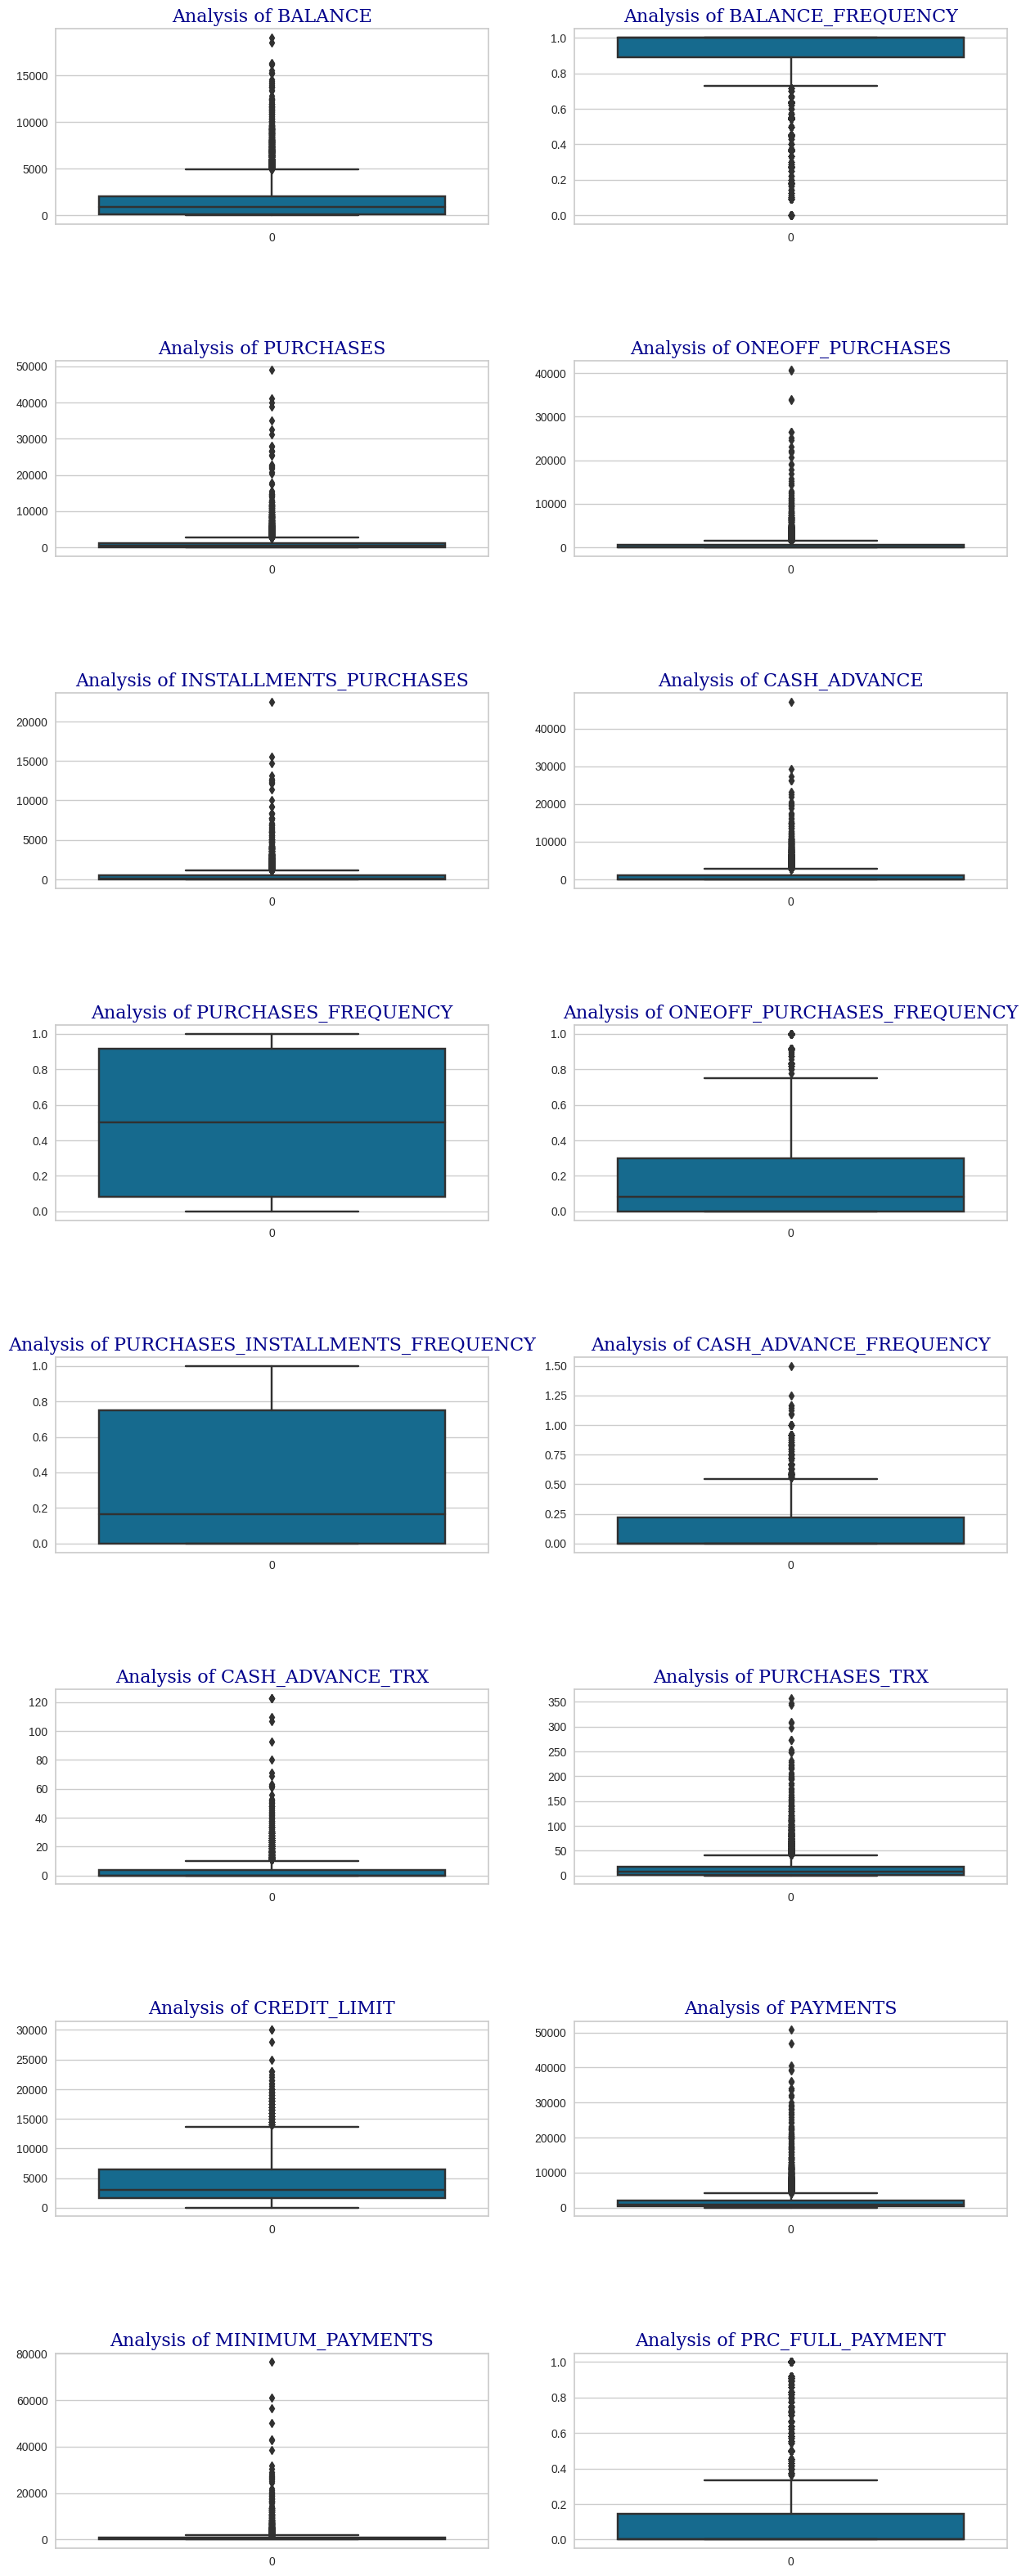

In [14]:
plot_boxplot(df, col_name)

Thông qua các biểu đồ boxplot, ta nhận thấy rằng có rất nhiều giá trị ngoại lai trên từng cột, trong trường hợp này, việc loại bỏ hết tất cả các điểm dữ liệu này là hoàn toàn không tốt, nhất là đối với những bộ dữ liệu có ít data sample như thế này (chỉ có 8950). 

Thay vào đó, với chúng ta sẽ có các cách khác như dự đoán các outlier hoặc thay thế chúng bằng giá trị mean hay median. Chúng ta cũng có thể thay thế các outlier này bằng NaN rồi dùng các thuật toán khác, ví dụ như KNNImputer để dự đoán và điền vào các giá trị NaN này.

## Data Preprocessing

Thuật toán K-means mà chúng ta dùng để phâm cụm sau này là một thuật toán rất nhạy cảm với các giá trị ngoại lai nên chúng ta phải cần xử lý các điểm dữ liệu này nhằm giúp cải thiện chất lượng hiệu suất của mô hình.

Như đã phân tích ở phần trước thì tập dữ liệu đang có có rất nhiều giá trị outlier và ta không thể loại bỏ chúng hoàn toàn ra khỏi tập dữ liệu. Ở đây ta sẽ thực hiện tính toán phạm vi giá trị không ngoại lệ của từng feature trong dataframe, sau đó thay thế những giá trị nằm ngoài phạm vi này bằng cận trên hoặc cận dưới gần với nó nhất.

In [15]:
def replace_outliers(df, col_names):
    for feature in df[col_names].columns:
        Q3 = df[feature].quantile(0.75)
        Q1 = df[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        df.loc[df[feature]>= upper_limit,feature] = upper_limit
        df.loc[df[feature]<=lower_limit,feature] = lower_limit
    return df

In [16]:
df_preprocessed = replace_outliers(df.copy(), col_name)

Ta xem lại boxplot của data đã được xử lý từ phía trên

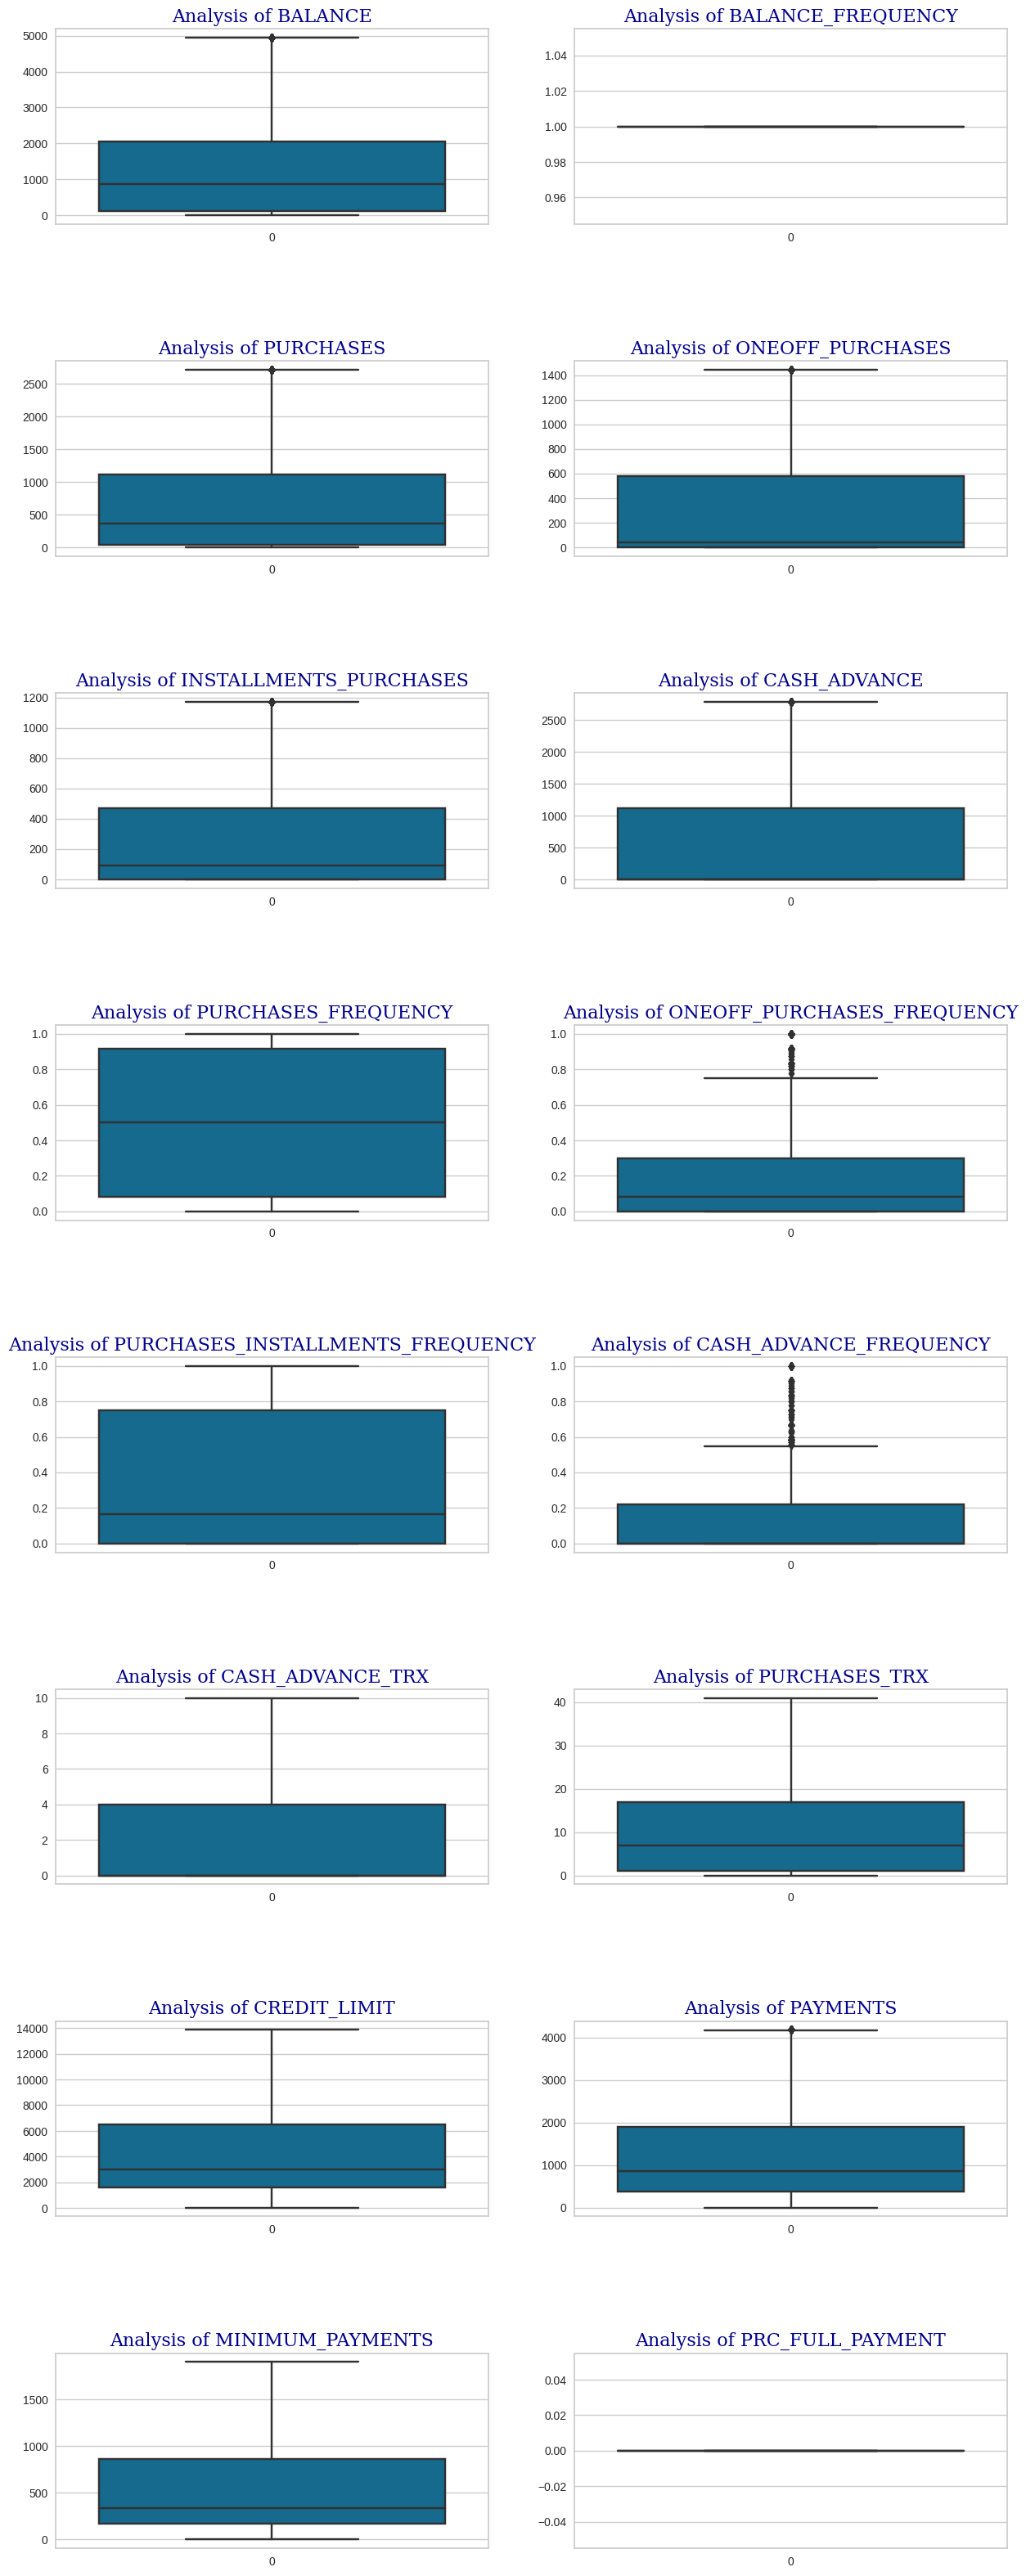

In [17]:
plot_boxplot(df_preprocessed, col_name)

Phần xử lý trên đã làm giảm bớt sự tác động tiêu cực của các outlier lên các cột dữ liệu, tiêu biểu như ở 4 cột: `PURCHASES`, `ONEOFF_PURCHASES`, `PURCHASES_INTALLMENT`, `CASH_ADVANCE` đã có sự cải thiện mà chúng ta có thể quan sát thông qua boxplot.

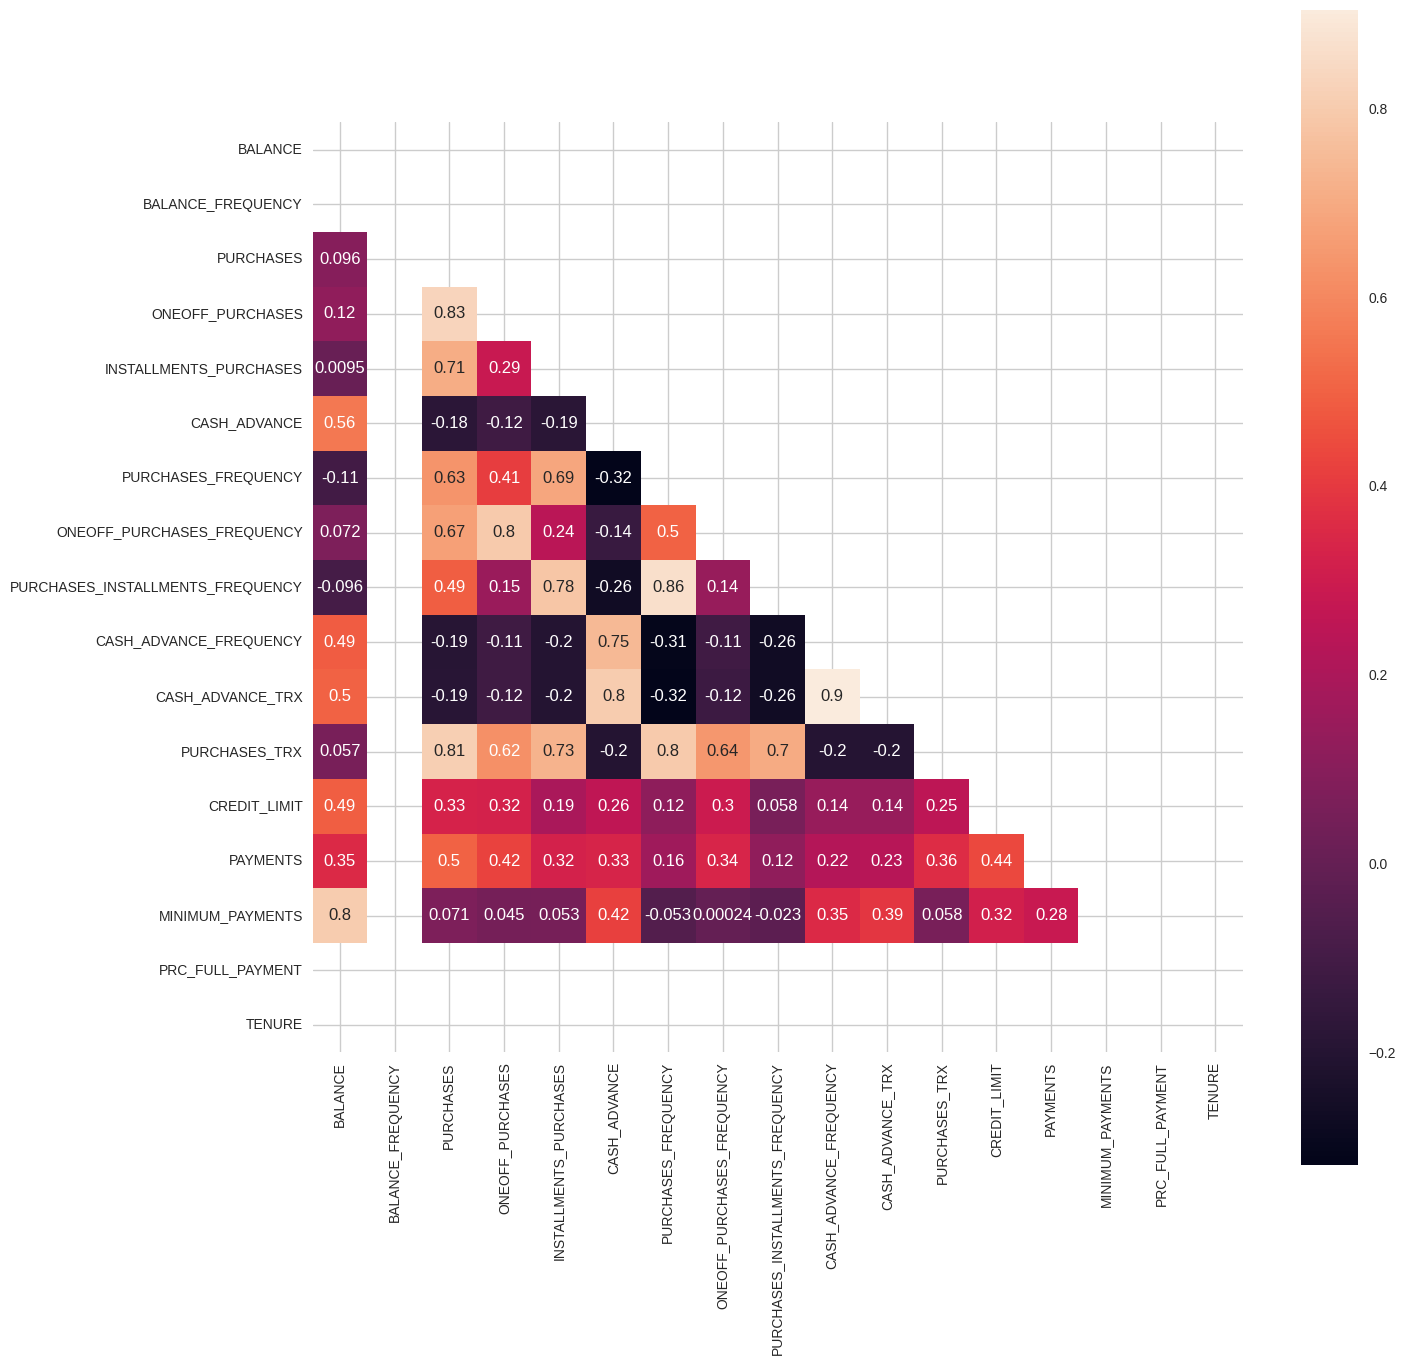

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df_preprocessed.corr(), annot=True, mask = np.triu(df_preprocessed.corr()), square=True)
plt.show()

Hầu hết các cột trong tập dữ liệu đều có sự tương quan khá tốt với những cột còn lại.

## Scaler

Các feature trong tập dữ liệu đang có nhiều khoảng giá trị với nhiều đơn vị khác nhau, vì vậy ta sẽ chuẩn hóa và đưa chúng về trong cùng một phạm vi và tương đồng nhau về phân phối. Ngoài ra, nếu ta phân cụm bằng thuật toán K-means thì đây là một thuật toán phân cụm dựa trên khoảng cách nên việc này cũng sẽ giúp mô hình đạt hiệu quả tốt hơn. 

Ở đây ta sẽ sử dụng StandardScaler

In [19]:
#scaler = MinMaxScaler()
#scaler = PowerTransformer(method='yeo-johnson')
#scaler = Normalizer()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_preprocessed)
df_preprocessed_scaled = pd.DataFrame(data_scaled, columns=df_preprocessed.columns)

## PCA

Thuật toán K-mean sử dụng khoảng cách Euclide, khoảng cách này bắt đầu mất đi ý nghĩa khi số lượng chiều của dữ liệu tăng lên. Vì vậy, trước khi sử dụng thuật toán K-means để phân cụm, chúng ta sẽ xem xét giảm số lượng chiều của tập dữu liệu. Ở đây, ta sẽ sử dụng PCA, đây là thuật toán giảm kích thước phổ biến nhất cho đến nay.

In [20]:
pca = PCA(n_components = len(df_preprocessed_scaled.columns))
df_pca = pca.fit_transform(df_preprocessed_scaled)

In [21]:
num_com = range(1, 18)
df_com = pd.DataFrame(num_com, columns=['Number of Components'])
num_com = range(1, 18)
com = pd.DataFrame(num_com, columns=['Number of Components'])
cpev = (pca.explained_variance_ratio_.cumsum()) * 100
df_cpev = pd.DataFrame(cpev, columns=['Cumulative Percentage of Explained Variance'])
df_cpev = pd.concat([df_com, df_cpev], axis=1)
df_cpev.index = df_cpev.index + 1
df_cpev
df_cpev.style.set_properties(**{'text-align': 'center'})

Điều này cho biết số lượng phương sai được giải thích khi chúng ta thêm các thành phần chính. Riêng PC1 giải thích được 36.83%, PC1 và PC2 giải thích được 63.83%, PC1, PC2 và PC3 giải thích được 74.53%, v.v., và từ 14 thành phần chính trở lên, nó có thể bảo phủ được 100% lượng thông tin từ bộ dữ liệu gốc.

Nhưng để biết được thực hiện PCA với số lượng thành phần chính như thế nào là tốt nhất, ta sẽ thực hiện so sánh từng số lượng thành phần chính với nhau trong các trường hợp số cụm khác nhau và đánh giá chúng dựa theo tiêu chí là silhouette score và Inertia score. Đây là 2 độ đo phổ biến thường được dùng trong đánh giá chất lượng phân cụm.

** Inertia là tổng bình phương khoảng cách.

In [22]:
for y in range(2, 8):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(df_preprocessed_scaled)
    for x in range(2, 10):
        alg = KMeans(n_clusters = x, random_state = 42, n_init = 10)
        label = alg.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_p, label) , ' and Inertia: ',alg.inertia_)
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.4118564855471489  and Inertia:  47679.30020041238
Silhouette-Score for 3 Clusters:  0.4528673502615642  and Inertia:  26923.29488851718
Silhouette-Score for 4 Clusters:  0.4096646090683134  and Inertia:  19592.547043282
Silhouette-Score for 5 Clusters:  0.4129184501268613  and Inertia:  15729.524736872929
Silhouette-Score for 6 Clusters:  0.39427433480359125  and Inertia:  12888.85997129729
Silhouette-Score for 7 Clusters:  0.3830428743901931  and Inertia:  10767.678688105425
Silhouette-Score for 8 Clusters:  0.40110515860953894  and Inertia:  9181.926454673838
Silhouette-Score for 9 Clusters:  0.3847374737545311  and Inertia:  8142.053823105645

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.3675179021868157  and Inertia:  61078.36769791848
Silhouette-Score for 3 Clusters:  0.38116746504508736  and Inertia:  40137.13061590555
Silhouette-Score for 4 Clusters:  0.38057558552406084  and Inertia:  29980.113

Thông qua các kết quả phía trên, ta quyết định sẽ chọn PCA với 4 thành phần chính vì nó hài hòa giữa việc phủ được 81% bộ dữ liệu và giúp ta đạt được kết quả phân cụm ở mức khá.

In [23]:
# Áp dụng n_components = 4
pca = PCA(n_components=4, random_state=42)
df_preprocessed_scaled_pca = pca.fit_transform(df_preprocessed_scaled)

## K-means Model Part

### Bắt đầu đánh giá chất lượng k-cụm bằng các độ đo thông dụng

Đầu tiên, chúng ta dùng độ đo **distortion/Inertia**: Đây là bình phương khoảng cách từ các điểm dữ liệu đến tâm của nó.

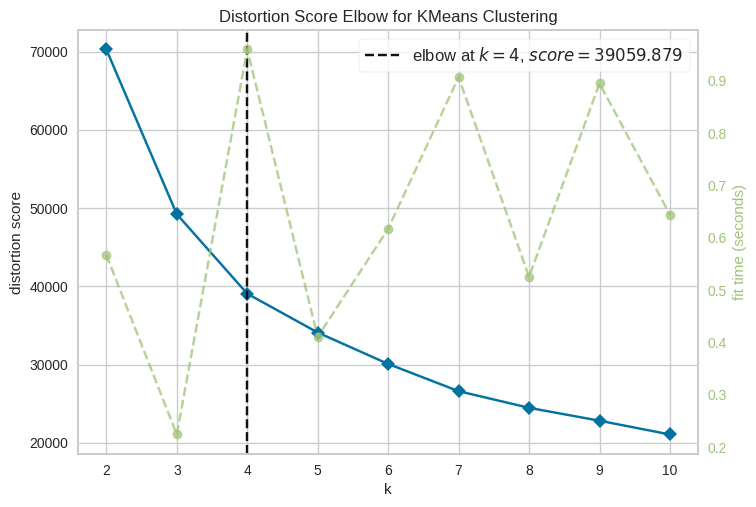

In [24]:
model = KMeans(random_state=42, n_init = 10)
visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(df_preprocessed_scaled_pca)
visualizer.show()
plt.show();

Nếu dựa và phương pháp elbow với metric distortion thì chúng ta nhận được một số cụm tối ưu là k = 4 với tổng bình phương sai số là 39059.879

### Silhouette


Độ đo Silhouette là một phương pháp được sử dụng để đánh giá chất lượng của các nhóm trong phân cụm. Phương pháp này tính toán một giá trị đo lường cho mỗi điểm dữ liệu trong một nhóm dựa trên sự tương đồng giữa điểm đó và các điểm trong cùng nhóm, cũng như sự tương đồng giữa điểm đó và các điểm dữ liệu trong các nhóm khác.

Giá trị đo silhouette được tính bằng cách lấy trung bình của các giá trị silhouette của tất cả các điểm dữ liệu trong tập dữ liệu. Mỗi giá trị silhouette được tính bằng cách lấy hiệu số giữa sự tương đồng trung bình giữa điểm và tất cả các điểm trong cùng nhóm với sự tương đồng trung bình giữa điểm và tất cả các điểm trong nhóm gần nhất khác. Giá trị silhouette có thể nằm trong khoảng từ -1 đến 1, với giá trị càng gần 1 thể hiện sự phân cụm tốt hơn, trong khi giá trị gần -1 cho thấy điểm đó có thể được phân vào nhóm khác tốt hơn.

Độ đo Silhouette giúp đánh giá mức độ phân tách và tập trung của các nhóm trong phân cụm. Một giá trị silhouette cao cho thấy các điểm dữ liệu trong cùng một nhóm tương đồng và khác biệt với các điểm trong các nhóm khác, trong khi một giá trị silhouette thấp cho thấy mức độ phân tách giữa các nhóm không tốt.

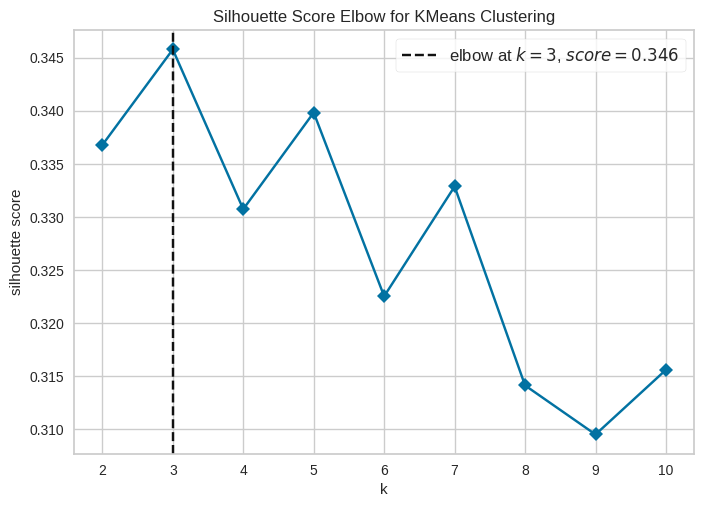

In [25]:
model = KMeans(random_state=42, n_init = 10)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False)

visualizer.fit(df_preprocessed_scaled_pca)
visualizer.show()
plt.show();

Với silhouette thì ta có một lựa chọn cho số cụm là k = 3, với silhouette score = 0.346

### Calinski Harabasz

Chỉ số này đo lường mối quan hệ giữa sự thay đổi trong các cụm (intra-cluster) và sự thay đổi giữa các cụm (inter-cluster). Nghĩa là, nó dựa trên tỷ lệ giữa tổng khoảng cách giữa các điểm trong một nhóm với giá trị trung bình của nhóm và tổng khoảng cách giữa mỗi điểm với giá trị trung bình chung của dữ liệu. 

Giá trị Calinski-Harabasz càng cao, tức là sự phân tách giữa các nhóm càng tốt và sự tương đồng trong nhóm càng lớn và nó được coi là một sự phân cụm tốt. Ngược lại, giá trị Calinski-Harabasz thấp cho thấy mức độ phân tách giữa các nhóm không tốt và các điểm dữ liệu trong nhóm có sự biến động lớn với nhau.

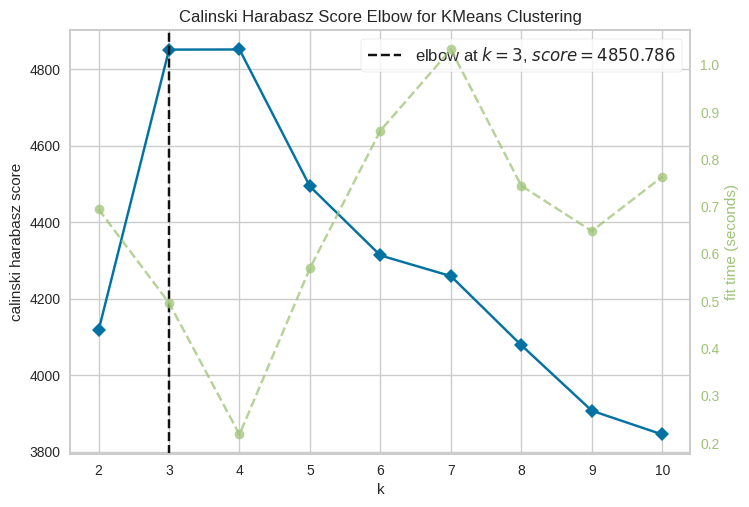

In [26]:
model = KMeans(random_state=42, n_init = 10)
visualizer = KElbowVisualizer(model, k=(2,11), metric='calinski_harabasz')

visualizer.fit(df_preprocessed_scaled_pca)
visualizer.show()
plt.show();

Với Calinski Harabasz ta cũng có số cụm tối ưu là k = 3 với Calinski Harabasz score = 4850.786

**Davies-Bouldin Score**: Nó là thước đo độ tương tự giữa các mẫu dữ liệu trong một cụm. Nó được tính bằng giá trị trung bình của khoảng cách giữa mỗi điểm dữ liệu và trung tâm cụm gần nhất. Nói chung, giá trị Davies-Bouldin càng nhỏ thì mô hình phân cụm càng tốt. Điều này xảy ra do giá trị Davies-Bouldin đo mức độ tương tự giữa mỗi cụm và các lân cận gần nhất của nó và giá trị này càng nhỏ thì độ tương tự càng nhỏ, do đó, sự tách biệt giữa các cụm càng tốt.

In [27]:
n_clusters = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, random_state = 42, n_init = 10)
    pred = kmeans.fit_predict(df_preprocessed_scaled_pca)

    silhouette.append(silhouette_score(df_preprocessed_scaled_pca, pred))
    calinski_harabasz.append(calinski_harabasz_score(df_preprocessed_scaled_pca, pred))
    davies_bouldin.append(davies_bouldin_score(df_preprocessed_scaled_pca, pred))
    n_clusters.append(n_cluster)
    

result = pd.DataFrame({
    'Clusters': n_clusters,
    'Silhouette': silhouette,
    'Calinski Harabasz': calinski_harabasz,
    'Davies Bouldin': davies_bouldin})

result.sort_values('Silhouette', ascending=False)

Clusters  Silhouette  Calinski Harabasz  Davies Bouldin
1         3    0.345780        4850.785516        1.070995
3         5    0.339840        4493.095058        1.039057
0         2    0.336786        4116.722603        1.307846
5         7    0.332879        4258.771586        1.046245
2         4    0.330743        4851.152123        1.006071
4         6    0.322542        4312.776061        1.112221
8        10    0.315619        3844.765566        1.082993
6         8    0.314147        4078.157311        1.067021
7         9    0.309529        3906.927093        1.098464

Dựa vào bảng tổng kết trên, ta có thể thấy rằng nếu dựa vào điểm số Silhouette thì số cụm tối ưu nhất cho bộ dữ liệu này là 3, 5 hoặc là 2. (Nếu sắp xếp theo sự ưu tiên của Silhouette).

Nhưng việc phân bộ dữ liệu thành 2 cụm sẽ không mang nhiều ý nghĩa, không mang lại giá trị chi tiết hơn sau khi kết thúc việc phân cụm (ví dụ như không phân khúc được nhiều nhóm khách hàng).

Vì thế, ta sẽ xem xét chọn k = 3 và k = 5 để phân tích tiếp. Về Silhouette và Calinski Harabasz thì k = 3 đã nhỉnh hơn so với k = 5, nhưng khi xét về Davies Bouldin thì k = 5 lại nhỉnh hơn k = 3, nhưng không đáng kể.

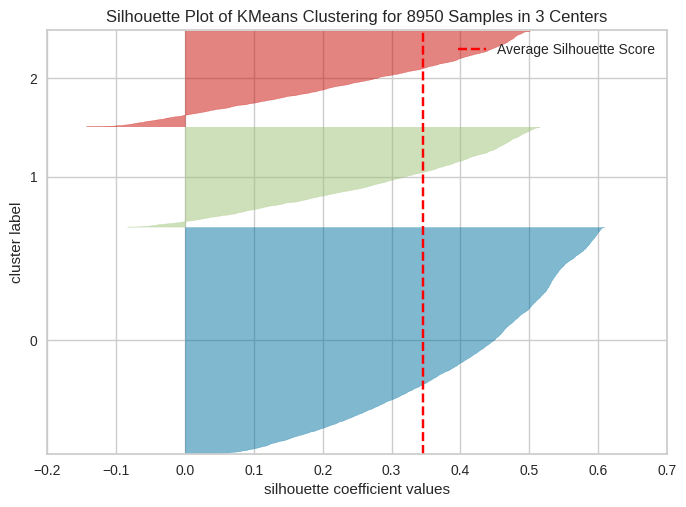

In [28]:
model = KMeans(n_clusters=3, random_state=42, n_init = 10)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_preprocessed_scaled_pca)
visualizer.show()
plt.show()

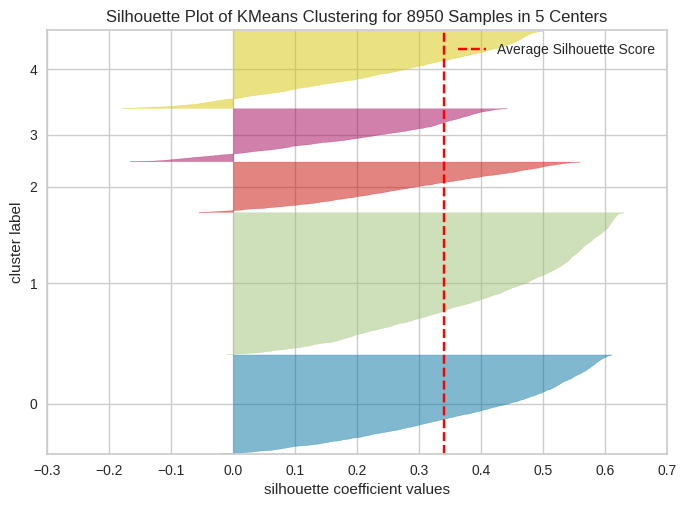

In [29]:
model = KMeans(n_clusters=5, random_state=42, n_init = 10)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_preprocessed_scaled_pca)
visualizer.show()
plt.show()

Trong 2 trường hợp trên, ta thấy mỗi mẫu dữ liệu trong từng nhóm đều có hệ số silhouette cao hơn mức trung bình, tuy nhiên, khi quan sát biểu đồ SilhouetteVisualizer của trường hợp k = 3 thì ta lại thấy các cụm có vẻ có độ dày đồng đều hơn so với trường hợp k = 5.


Vậy ta quyết định sẽ chọn k = 3 làm số cụm tối ưu cho thuật toán K-means

In [30]:
kmeans_model = KMeans(n_clusters = 3, n_init = 10, random_state = 42)

In [31]:
kmeans_model.fit(df_preprocessed_scaled_pca)
labels = kmeans_model.labels_

### Biểu diễn các cụm trên đồ thị 3 chiều

In [32]:
pca = PCA(n_components=3)
kmean_pca_visualize_3d = pd.DataFrame(pca.fit_transform(df_preprocessed_scaled), columns=["pca_1", "pca_2", "pca_3"])

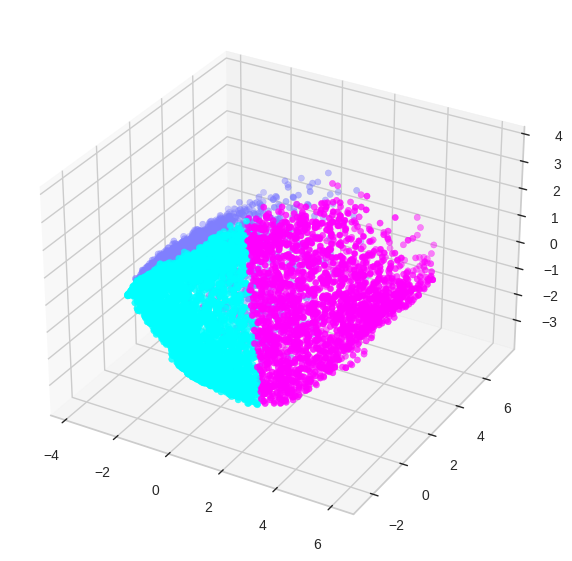

In [33]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(kmean_pca_visualize_3d.pca_1, kmean_pca_visualize_3d.pca_2, kmean_pca_visualize_3d.pca_3, c=kmeans_model.labels_, cmap="cool")
plt.show()

### Vẽ trên mặt phẳng 2 chiều

In [34]:
pca = PCA(n_components=2)
kmean_pca_visualize_2d = pd.DataFrame(pca.fit_transform(df_preprocessed_scaled), columns=["pca_1", "pca_2"])

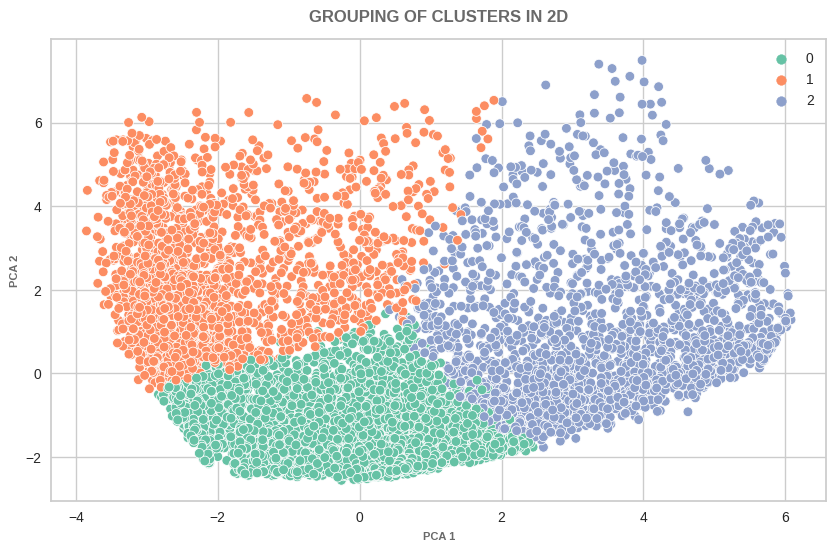

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca_1', y='pca_2', hue=kmeans_model.labels_, 
                     data=kmean_pca_visualize_2d, palette = 'Set2')
plt.title('GROUPING OF CLUSTERS IN 2D', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show()

Quan sát các cụm đã được biểu diễn trong không gian 3 chiều và 2 chiều thì ta có nhận xét được rằng các cụm được phân ra với nhau khá cách biệt, có đường phân cách khá rõ ràng, tuy nhiên vẫn còn 1 ít điểm dữ liệu của các cụm bị hoà lẫn vào nhau.

Cụm màu cam và màu xanh lá cây có vẻ là phân biệt với nhau rõ ràng và ít bị overlap với nhau hơn.

Ta xây dựng model K-means chính thức:

In [36]:
metrics = []

kmeans = KMeans(n_clusters= 3, random_state = 42, n_init = 10)
pred = kmeans.fit_predict(df_preprocessed_scaled_pca)

model = 'K-Means'
n_clusters = 3
silhouette = silhouette_score(df_preprocessed_scaled_pca, pred)
calinski_harabasz = calinski_harabasz_score(df_preprocessed_scaled_pca, pred)
davies_bouldin = davies_bouldin_score(df_preprocessed_scaled_pca, pred)

metrics.append((model, n_clusters, silhouette, calinski_harabasz, davies_bouldin))

df_kmn = pd.DataFrame(metrics, columns=['Model', 'Number of Clusters', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin'])
df_kmn

Model  Number of Clusters  Silhouette  Calinski Harabasz  Davies Bouldin
0  K-Means                   3     0.34578        4850.785516        1.070995

## Hierarchical Clustering

Hierarchical là một phương pháp phân cụm theo thứ bậc hay còn gọi là gom cụm phân tầng. Có 2 cách tiếp cận là:
- bottom-up (hợp nhất): Ban đầu xem mối điểm dữ liệu là một cụm riêng lẻ, sau đó gom 2 cụm gần nhất lại với nhau cho đến khi nào chỉ còn lại 1 cụm duy nhất.
- top-down (phân tách): Phương pháp này ngược lại với phương pháp hợp nhất Bottom-up. Thay vì bắt đầu với n cụm, ta bắt đầu với 1 cụm duy nhất và gán tất cả các điểm
cho cụm này. Tại mỗi lần lặp, ta phân chia điểm xa nhất trong cụm và lặp lại quy trình này cho đến khi mỗi cụm chỉ chứa một điểm duy nhất.

Trong quá trình gom nhóm các cụm lại với nhau, ta sẽ có các tiêu chí để tính khoảng cách giữa 2 cụm với nhau như sau:
- complete-linkage:  Đây là khoảng cách lớn nhất giữa 2 điểm dữ liệu trong mỗi cụm
- single-linkage: Đây là khoảng cách bé nhất giữa 2 điểm dữ liệu trong mỗi cụm
- average-linkage: Là khoảng cách trung bình của tất cả các điểm dữ liệu ở mỗi cụm.
- centroid: Là khoảng cách giữa 2 tâm của mỗi nhóm.
- Phương pháp phương sai tối thiểu của Ward: Phương pháp này đo lường khoảng cách giữa hai tâm cụm thông qua sự suy giảm phương sai. Tức là việc phân cụm sẽ được coi là hợp lý nếu như sau khi phân cụm thì phương sai giảm một giá trị lớn. 
- Ngoài ra, còn có các tiêu chí liên kết khác như median, weighted...

Ở đây, ta sẽ tiếp cận theo phương pháp gom cụm phân tầng dựa trên sự hợp nhất các cụm lại với nhau (agglomerative). Trong Python, thư viện scikit-learn cung cấp AgglomerativeClustering để thực hiện phân cụm theo phương pháp này.

In [37]:
from scipy.cluster.hierarchy import linkage, dendrogram

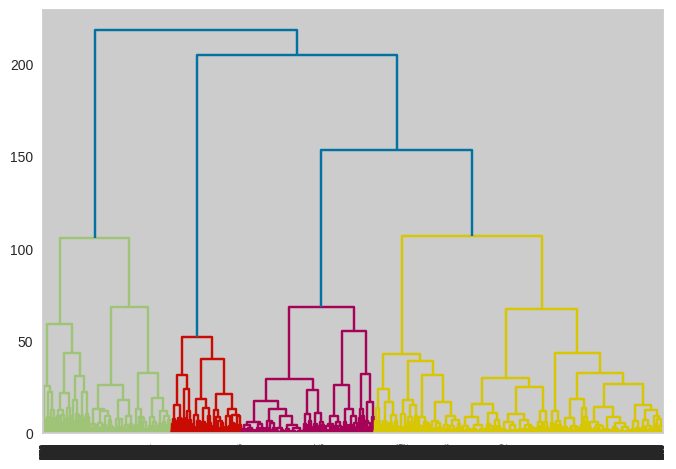

In [38]:
dend = linkage(df_preprocessed_scaled_pca, method = 'ward', metric='euclidean') # Khoảng cách được sử dụng để tính toán các khoảng cách là Euclidean.
dendrogram(dend)
plt.show();

Quan sát từ dendrogram phía trên, ta nhậ thấy có thể phân tập dữ liệu thành 3 hoặc 4 cụm với phương pháp phân cụm Agglomerative

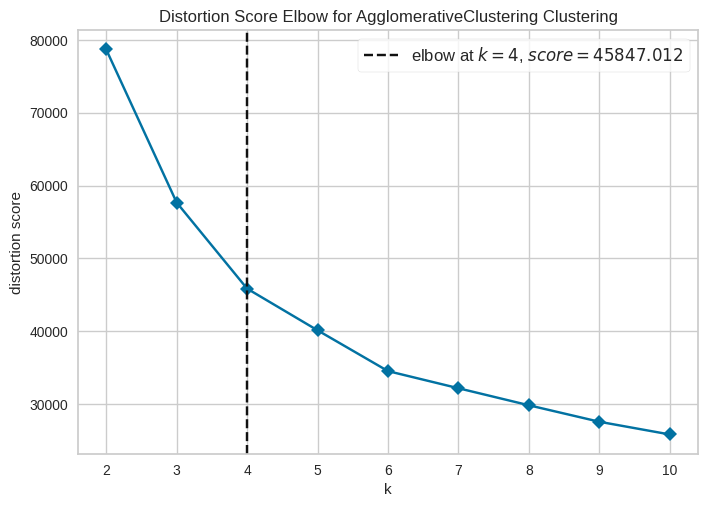

In [39]:
from sklearn.cluster import AgglomerativeClustering
visualizer = KElbowVisualizer(AgglomerativeClustering(linkage = 'ward', metric='euclidean'), timings=False)
visualizer.fit(df_preprocessed_scaled_pca)
visualizer.show()
plt.show();

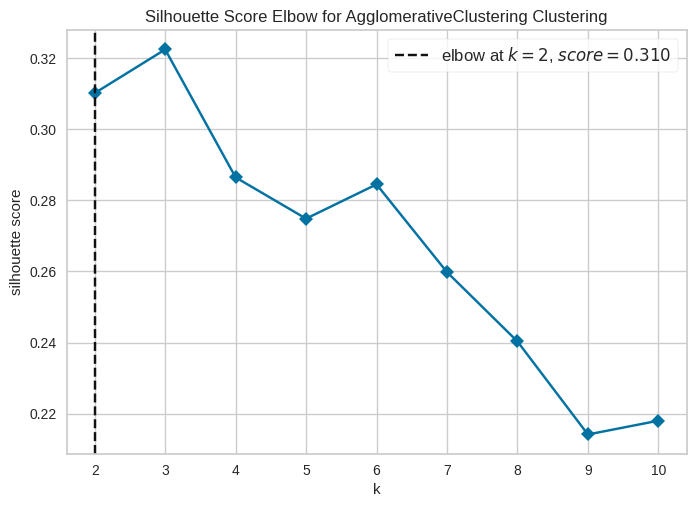

In [40]:
visualizer = KElbowVisualizer(AgglomerativeClustering(linkage = 'ward', metric='euclidean'), metric='silhouette', timings=False)
visualizer.fit(df_preprocessed_scaled_pca)
visualizer.show()
plt.show();

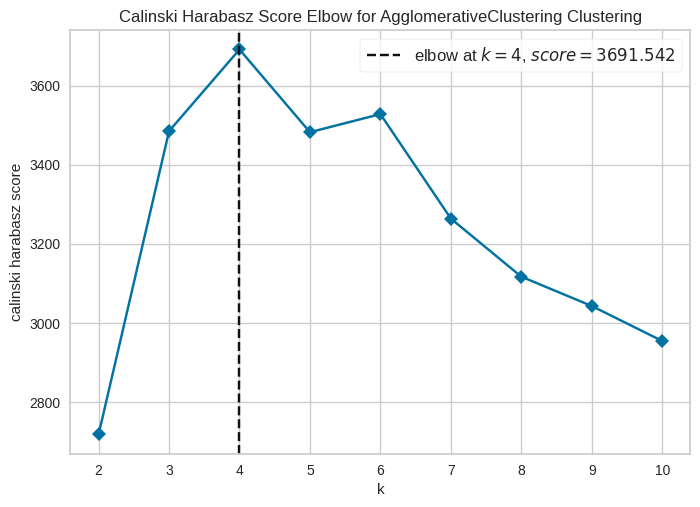

In [41]:
visualizer = KElbowVisualizer(AgglomerativeClustering(linkage = 'ward', metric='euclidean'), metric='calinski_harabasz', timings=False)
visualizer.fit(df_preprocessed_scaled_pca)
visualizer.show()
plt.show()

Qua các biểu đồ trên, ta nhận được kết quả là k = 4 hoặc k = 2 là các số cụm mà ta có thể được cân nhắc. Nhưng để dễ dàng so sánh các trường hợp với nhau, hãy xuất 1 bảng kết quả chi tiết

In [42]:
n_clusters = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []

for n_cluster in range(2, 11):
    ac = AgglomerativeClustering(n_clusters=n_cluster)
    pred = ac.fit_predict(df_preprocessed_scaled_pca)

    silhouette.append(silhouette_score(df_preprocessed_scaled_pca, pred))
    calinski_harabasz.append(calinski_harabasz_score(df_preprocessed_scaled_pca, pred))
    davies_bouldin.append(davies_bouldin_score(df_preprocessed_scaled_pca, pred))
    n_clusters.append(n_cluster)
    
result = pd.DataFrame({
    'Clusters': n_clusters,
    'Silhouette': silhouette,
    'Calinski Harabasz': calinski_harabasz,
    'Davies Bouldin': davies_bouldin})

result.sort_values('Silhouette', ascending=False)

Clusters  Silhouette  Calinski Harabasz  Davies Bouldin
1         3    0.322382        3484.951328        1.130725
0         2    0.310122        2717.904774        1.371048
2         4    0.286434        3691.542294        1.104261
4         6    0.284472        3528.101857        1.227523
3         5    0.274846        3482.385082        1.131750
5         7    0.259815        3263.865474        1.261104
6         8    0.240346        3116.922031        1.194396
8        10    0.218066        2954.365087        1.267091
7         9    0.214196        3042.799122        1.202061

Dựa vào bảng tổng hợp trên thì ta nhận thấy top 3 số cụm tối ưu được xếp theo thứ tự của Silhouette là 3, 2 và 4 cụm (ta ưu tiên chỉ số silhouette đầu tiên).

Như đã phân tích ở phần thuật toán K-means thì ta sẽ bỏ qua việc phân bộ dữ liệu thành 2 cụm để gia tăng sự chi tiết trong các nhóm khách hàng. Vậy ta còn 2 trường hợp là k = 3 và k = 4. Nếu xét về silhouette thì k = 3 có vẻ nhỉnh hơn so với k = 4, nhưng xét 2 độ đo còn lại thì k = 4 lúc này đã chiếm ưu thế hơn k = 3 ở cả 2 độ đo là Calinski Harabasz	và Davies Bouldin.

Trước tiên ta thử dùng k = 4 để tiến hành phân cụm

In [43]:
hc_model = AgglomerativeClustering(n_clusters=4, linkage = 'ward', metric='euclidean')
hc_model.fit(df_preprocessed_scaled_pca)
hc_labels = hc_model.labels_

Vẽ các cụm trên không gian 2 chiều

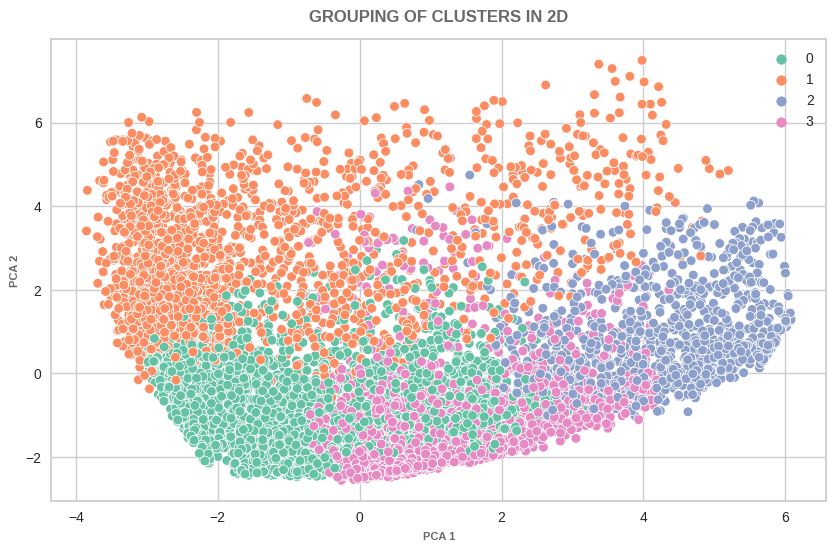

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca_1', y='pca_2', hue=hc_labels, 
                     data=kmean_pca_visualize_2d, palette = 'Set2')
plt.title('GROUPING OF CLUSTERS IN 2D', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

Khi quan sát kết quả phân cụm được biểu diễn trên một mặt phẳng 2D, ta nhận thấy các phân cụm bị lẫn lộn vào nhau một cách lộn xộn, kết quả trực quan này cho thấy đây có thể là một phân cụm không tốt và kém chất lượng.

Ta thử xây dựng lại mô hình với k = 3

In [45]:
hc_model = AgglomerativeClustering(n_clusters=3, linkage = 'ward', metric='euclidean')
hc_model.fit(df_preprocessed_scaled_pca)
hc_labels = hc_model.labels_

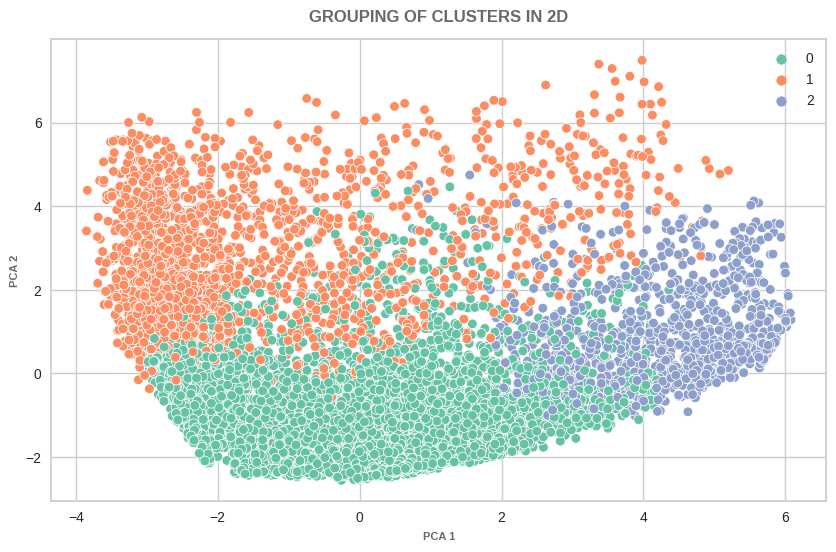

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca_1', y='pca_2', hue=hc_labels, 
                     data=kmean_pca_visualize_2d, palette = 'Set2')
plt.title('GROUPING OF CLUSTERS IN 2D', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

Với k = 3 thì mô hình cho ra kết quả phân cụm cải thiện hơn một tí so với khi k = 4, điều này là hợp lý khi mà số cụm giảm xuống thì sự overlap giữa các cụm sẽ được giảm đi.

Có lẽ thuật toán phân cụm phân tầng theo hướng tiếp cận bottom-up AgglomerativeClustering không thực sự phù hợp với bộ dữ liệu này.

Ta sẽ chọn k = 3 để xây dựng mô hình AgglomerativeClustering chính thức

In [47]:
metrics = []

hc = AgglomerativeClustering(n_clusters=3, linkage = 'ward', metric='euclidean')
pred = hc.fit_predict(df_preprocessed_scaled_pca)

model = 'Hierarchical Clustering'
n_clusters = 3
silhouette = silhouette_score(df_preprocessed_scaled_pca, pred)
calinski_harabasz = calinski_harabasz_score(df_preprocessed_scaled_pca, pred)
davies_bouldin = davies_bouldin_score(df_preprocessed_scaled_pca, pred)

metrics.append((model, n_clusters, silhouette, calinski_harabasz, davies_bouldin))

df_hc = pd.DataFrame(metrics, columns=['Model', 'Number of Clusters', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin'])
df_hc

Model  Number of Clusters  Silhouette  Calinski Harabasz  \
0  Hierarchical Clustering                   3    0.322382        3484.951328   

   Davies Bouldin  
0        1.130725

## Gaussian Mixture Clustering

Gaussian Mixture Clustering là một thuật toán phân cụm dựa trên mô hình phân phối Gaussian. Điểm đặc biệt của thuật toán này là nó mô hình hóa dữ liệu bằng cách sử dụng một tập hợp các phân phối Gaussian, mỗi phân phối đại diện cho một cụm.

Gaussian Mixture Clustering phù hợp với các tình huống khi dữ liệu có thể thuộc vào nhiều phân phối Gaussian khác nhau, hoặc khi các cụm có kích thước và hình dạng khác nhau. Thuật toán này tìm cách tìm ra một phân phối hỗn hợp (mixture distribution) để tốt nhất mô hình hóa dữ liệu.

Trong Python, ta có thể sử dụng thư viện scikit-learn để thực hiện model Gaussian Mixture Clustering.

In [48]:
from sklearn.mixture import GaussianMixture

In [49]:
n_clusters = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []

for n_cluster in range(2, 11):
    gm = GaussianMixture(n_components=n_cluster, n_init=10, random_state = 42)
    pred = gm.fit_predict(df_preprocessed_scaled_pca)

    silhouette.append(silhouette_score(df_preprocessed_scaled_pca, pred))
    calinski_harabasz.append(calinski_harabasz_score(df_preprocessed_scaled_pca, pred))
    davies_bouldin.append(davies_bouldin_score(df_preprocessed_scaled_pca, pred))
    n_clusters.append(n_cluster)
    
result = pd.DataFrame({
    'Clusters': n_clusters,
    'Silhouette': silhouette,
    'Calinski Harabasz': calinski_harabasz,
    'Davies Bouldin': davies_bouldin})

result.sort_values('Silhouette', ascending=False)

Clusters  Silhouette  Calinski Harabasz  Davies Bouldin
0         2    0.213906        2677.304185        1.466195
1         3    0.190266        2451.988713        1.682465
2         4    0.106041        1899.682433        1.862562
5         7    0.077399        1849.431412        1.808084
6         8    0.074156        1708.165979        2.162746
7         9    0.072797        1636.448737        2.003198
8        10    0.064746        1626.323286        2.058698
4         6    0.051088        1586.997915        1.697117
3         5    0.048917        1642.874163        1.830787

Thông qua bảng tổng kết kết quả của các lần phân cụm phía trên thì ta thấy được rằng k = 2 thực sự là số cụm tối ưu nếu như ta sử dụng thuật toán phân cụm Gaussian Mixture Clustering, các metric của trường hợp này đều nhỉnh hơn so với tất cả các trường hợp còn lại.

Vì vậy, với thuật toán Gaussian Mixture Clustering ta quyết định sẽ chọn k = 2 làm số cụm cuối cùng để gom cụm bộ dữ liệu dùng thuật toán Gaussian Mixture Clustering.

In [50]:
gm_model = GaussianMixture(n_components=2, random_state = 42, n_init = 10)
gm_labels = gm_model.fit_predict(df_preprocessed_scaled_pca)

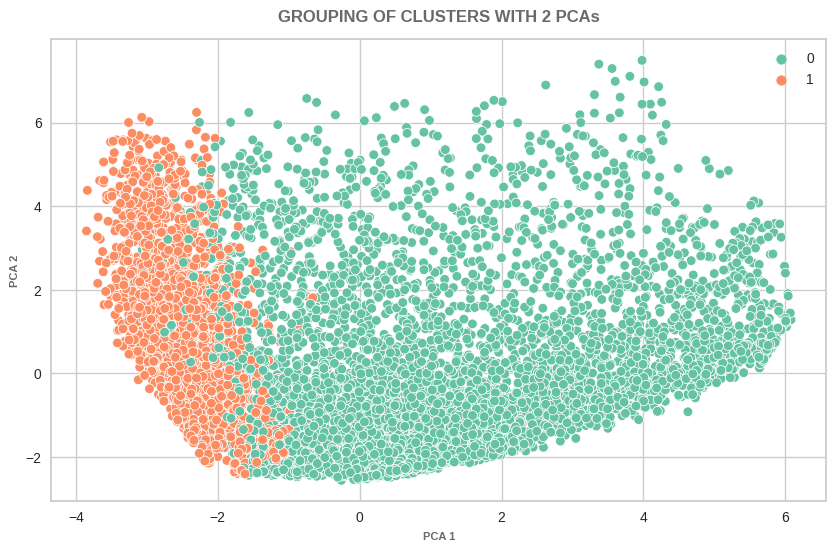

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca_1', y='pca_2', hue=gm_labels, 
                     data=kmean_pca_visualize_2d, palette = 'Set2')
plt.title('GROUPING OF CLUSTERS WITH 2 PCAs', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

Kết quả trực quan trên không gian 2 chiều của thuật toán GaussianMixture cũng cho thấy được 2 cụm có các điểm dữ liệu bị chồng chéo với nhau khá nhiều và không xuất hiện đường phân chia cụm rõ ràng.

Xây dựng model Gaussian Mixture Clustering cuối cùng:

In [52]:
metrics = []

gm = GaussianMixture(n_components=2, random_state = 42, n_init = 10)
pred = gm.fit_predict(df_preprocessed_scaled_pca)

model = 'Gaussian Mixture Clustering'
n_clusters = 2
silhouette = silhouette_score(df_preprocessed_scaled_pca, pred)
calinski_harabasz = calinski_harabasz_score(df_preprocessed_scaled_pca, pred)
davies_bouldin = davies_bouldin_score(df_preprocessed_scaled_pca, pred)

metrics.append((model, n_clusters, silhouette, calinski_harabasz, davies_bouldin))

df_gm = pd.DataFrame(metrics, columns=['Model', 'Number of Clusters', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin'])

df_gm

Model  Number of Clusters  Silhouette  \
0  Gaussian Mixture Clustering                   2    0.213906   

   Calinski Harabasz  Davies Bouldin  
0        2677.304185        1.466195

## Build final model

Sau khi xây dựng hết 3 mô hình là K-means, AgglomerativeClustering và Gaussian Mixture Clustering, ta sẽ có một bẳng tổng kết lại kết quả của 3 mô hình này như sau:

In [53]:
df_comp = pd.concat([df_kmn, df_hc, df_gm])
df_comp.sort_values('Silhouette', ascending=False)

Model  Number of Clusters  Silhouette  \
0                      K-Means                   3    0.345780   
0      Hierarchical Clustering                   3    0.322382   
0  Gaussian Mixture Clustering                   2    0.213906   

   Calinski Harabasz  Davies Bouldin  
0        4850.785516        1.070995  
0        3484.951328        1.130725  
0        2677.304185        1.466195

Ta thấy trong các model được ta xây dựng thì model K-means là cho các độ đo tốt nhất => Vì vậy ta chọn K-means làm mô hình để đưa ra kết quả cuối cùng.

Phần này sẽ thực hiện xây dựng 1 model phân cụm K-means từ lúc đọc dữ liệu cho đến khi xây dựng model và biểu diễn các cụm lên không gian 3 chiều và 2 chiều.

In [54]:
data = pd.read_csv("/content/drive/MyDrive/NMMH/Tuan5/Clustered_Customer_Data.csv")

In [55]:
def preprocessing_data(dataframe):
    col_drop = ['Unnamed: 0', 'Cluster']
    dataframe.drop(col_drop, axis = 1, inplace = True)
    dataframe_preprocessed = replace_outliers(dataframe, dataframe.columns)
    return dataframe_preprocessed

data_cluster = preprocessing_data(data.copy())

### Xây dựng mô hình

In [56]:
def build_model(data):
    pca = PCA(n_components=4, random_state=42)
    pipe = Pipeline(steps=[('scaler', StandardScaler()), ('pca', pca), ('cluster', KMeans(n_clusters=3, random_state = 42, n_init = 10))])
    model = pipe.fit(data)
    return model

kmeans_model_final = build_model(data_cluster)
kmeans_labels = kmeans_model_final.named_steps['cluster'].labels_

### Biểu diễn các cụm trên không gian 3 chiều

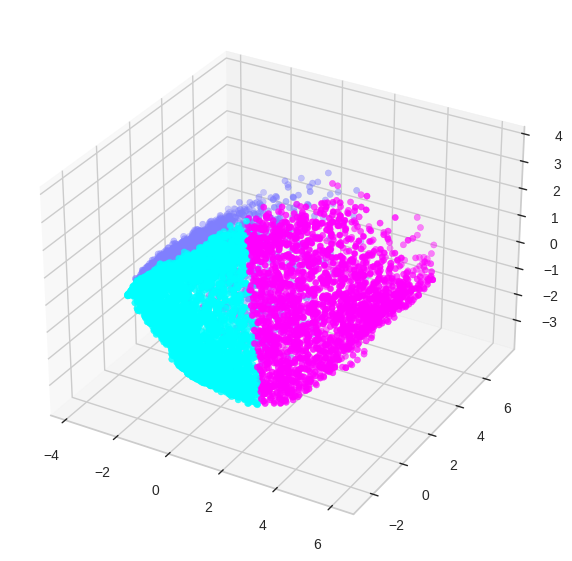

In [57]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(kmean_pca_visualize_3d.pca_1, kmean_pca_visualize_3d.pca_2, kmean_pca_visualize_3d.pca_3, c=kmeans_labels, cmap="cool")
plt.show()

### Biểu diễn các cụm trên không gian 2 chiều.

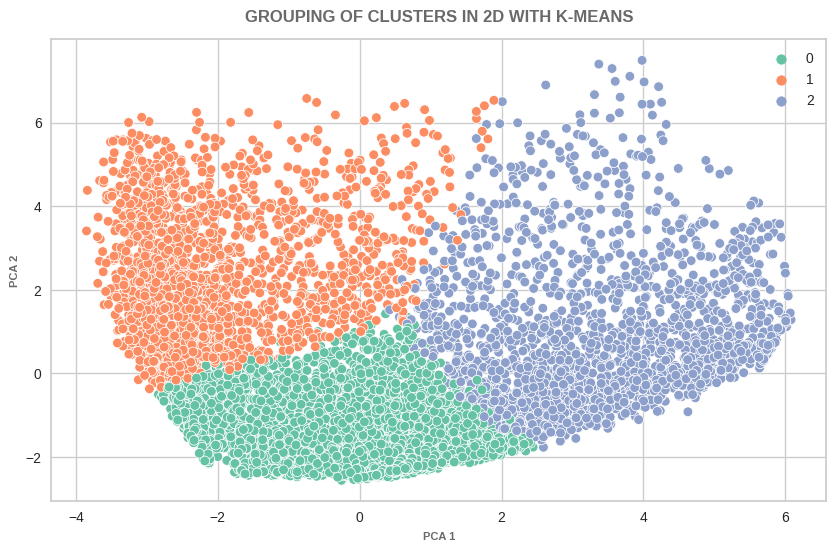

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca_1', y='pca_2', hue=kmeans_labels, 
                     data=kmean_pca_visualize_2d, palette = 'Set2')
plt.title('GROUPING OF CLUSTERS IN 2D WITH K-MEANS', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

### Đánh giá mô hình phân cụm

In [59]:
scaler = StandardScaler()
data_cluster_scaled = scaler.fit_transform(data_cluster)
pca = PCA(n_components=4)
data_cluster_scaled_pca = pca.fit_transform(data_cluster_scaled)

In [60]:
def measure_performance(df, label):
    print(f'Silhouette score: {silhouette_score(df, label)}')
    print(f'Calinski Harabasz score: {calinski_harabasz_score(df, label)}')
    print(f'Davies Bouldin score: {davies_bouldin_score(df, label)}')

In [61]:
measure_performance(data_cluster_scaled_pca, kmeans_labels)

Silhouette score: 0.34577969371478284
Calinski Harabasz score: 4850.785515812047
Davies Bouldin score: 1.0709948513723813


Các chỉ số trên là các chỉ số được dùng để đánh giá mô hình phân cụm K-means đã được xây dựng, các chỉ số này không quá tốt nhưng vẫn nằm trong ngưỡng chấp nhận được, cho thấy đây là một mô hình có hiệu quả nằm ở mức khá:
- Giá trị Silhouette score = 0.3457796937147827, cho thấy mức độ tách biệt và đồng nhất của các cụm khá tốt, nhưng không hoàn hảo. Các điểm dữ liệu trong cùng một cụm có xu hướng gần nhau hơn so với các cụm khác, tuy nhiên còn một số điểm dữ liệu chồng chéo hoặc gần ranh giới giữa các cụm. Điều này ta cũng có thể quan sát được trên biểu đồ 2D phía trên.
- Giá trị Davies Bouldin score = 1.0709948513723817 cũng cho thấy các điểm dữ liệu trong cùng một cụm có sự tương đồng khá tốt.

### Phân tích các nhóm

Ta thêm cột `my_cluster` có được từ thuật toán K-means vào bộ dữ liệu gốc.


In [62]:
data['my_cluster'] = kmeans_labels

<Axes: xlabel='my_cluster', ylabel='count'>

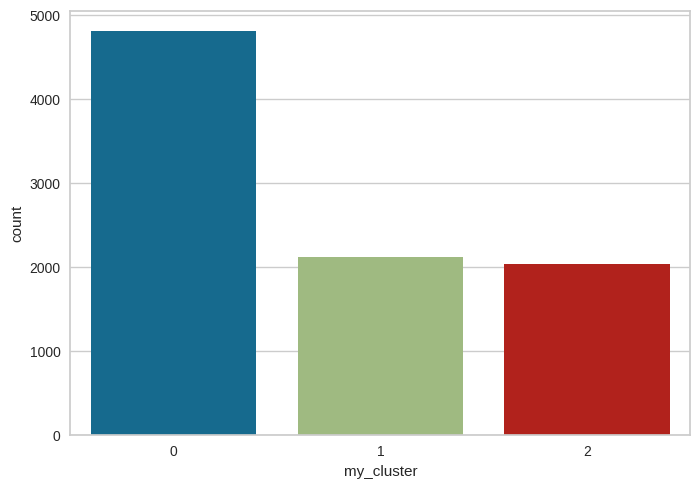

In [63]:
sns.countplot(data=data, x="my_cluster")

Ta thấy thuật model phân các khách hàng ra thành 3 cụm, trong đó cụm 1 và 2 tương đối đồng đều với nhau về số lượng với khoảng hơn 2000 bản ghi, còn lại là cụm 0 với gần 5000 bản ghi.

Bây giờ ta sẽ tiến hành phân tích đặc điểm của các khách hàng trong từng nhóm

Để xem các đặc điểm chung của các khách hàng trong từng nhóm, ta tính giá trị trung bình của:
- BALANCE: Số dư còn lại trong tài khoản.
- BALANCE_FREQUENCY: Tần suất cập nhật số dư.
- PURCHASES_FREQUENCY: Tần suất mua hàng được thực hiện bởi khách hàng.
- PURCHASES_INSTALLMENTS_FREQUENCY: Tần suất mua hàng trả góp.
- PURCHASES: Tổng Số tiền mua hàng được thực hiện từ tài khoản.
- PAYMENTS: Số tiền thanh toán được thực hiện bởi người dùng (bao gồm cả mua hàng và các hành vi khác).


In [64]:
df_out = data.groupby(by = 'my_cluster').mean()[['PURCHASES_INSTALLMENTS_FREQUENCY' ,'PURCHASES_FREQUENCY' ,'BALANCE_FREQUENCY', 'BALANCE', 'PURCHASES','PAYMENTS']].reset_index()
df_out

my_cluster  PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY  \
0           0                          0.341991             0.450855   
1           1                          0.105860             0.180826   
2           2                          0.687895             0.907436   

   BALANCE_FREQUENCY      BALANCE    PURCHASES     PAYMENTS  
0           0.811449   618.462056   386.974863   721.209938  
1           0.938032  3305.327672   246.211514  2464.809811  
2           0.969608  1984.664818  3253.679270  3364.393764

Thông qua một số đặc điểm hành vi của khách hàng, với 3 cụm mà ta có, ta có thể phân 3 cụm này vào các nhóm khách hàng như sau:
- Cluster 2: Đây là nhóm khách hàng có tần suất mua hàng nhiều nhất với tỉ lệ 0.907436 và cũng có tần suất cập nhật số dư rất cao với tỉ lệ lên đến 0.96. Đồng thời đây cũng là nhóm khách hàng thường xuyên mua hàng trả góp, cao nhất trong 3 nhóm. Tổng số tiền mua hàng được nhóm khách hàng này chi tiêu cũng cao nhất và hầu như nhóm này chỉ dùng thẻ tín dụng để thanh toán tiền mua hàng khi PAYMENTS không cao hơn PURCHASES nhiều.

- Cluster 1: Là nhóm thường xuyên có cập nhật số dư tài khoản và có số dư trong tài khoản cũng rất cao nhưng lại không có xu hướng muốn mua hàng với tỉ lệ thấp nhất trong 3 nhóm là 0.180826. Số tiền thực hiện việc mua hàng của nhóm này chỉ rơi vào khoảng 246.21, nhưng nhóm khách hàng này lại có xu hướng sử dụng thẻ tín dụng cho các mục đích thanh toán khác, điều này được thể hiện khi PAYMENTS trung bình của họ là 2464.809811. Nhóm này cũng là nhóm có số dư cao nhất trong 3 nhóm.

- Cluster 0: Là nhóm có chỉ số tần suất cập nhật số dư ở mức khá với 0.811449, nhưng lại có số dư không nhiều. Họ cũng có xu hướng ít mua hàng với tỉ lệ là 0.450855 (nhưng nhiều hơn nhóm số 1). Nhóm này cũng có tỉ lệ mua hàng trả góp cao hơn nhóm khách hàng thứ 1. Nhóm này có xu hướng mua hàng nhưng mức độ chi tiêu cho việc này không nhiều.

## Tổng kết và kết luận

Tóm lại, sau khi thực hiện xong bài toán phân cụm cho bộ dữ liệu chúng ta có 3 nhóm khách hàng:
 - Nhóm có xu hướng sử dụng thẻ tín dụng thường xuyên để mua hàng, tổng giá trị thanh toán trên thẻ tín dụng của nhóm này phần này phần lớn là dùng cho việc mua hàng. Đặc biệt thích mua hàng trả góp.
 - Nhóm có xu hướng sử dụng thẻ tín dụng nhưng không có nhu cầu mua hàng, chỉ sử dụng thẻ tín dụng để thực hiện các hành vi thanh toán cho các dịch vụ khác, đặc biệt số dư cao nhất trong 3 nhóm.
 - Nhóm sử dụng thẻ tín dụng nhưng số tiền thanh toán cho các hành vi mua hàng tương đối ít và cũng có tần suất mua hàng trung bình, ngoài ra nhóm khách hàng này cũng cân bằng giữa việc dùng thẻ tín dụng để thanh toán các khoản chi phí khác nhưng cũng không nhiều. Nhóm này cũng có xu hướng mua hàng trả góp.

Vào lúc đầu, trong tập dữ liệu gốc cũng có 1 cột tên là `Cluster`, ta sẽ xem thử các nhóm khách hàng trong cột này có dặc điểm như thế nào

In [65]:
df_out = data.groupby(by = 'Cluster').mean()[['PURCHASES_INSTALLMENTS_FREQUENCY' ,'PURCHASES_FREQUENCY' ,'BALANCE_FREQUENCY', 'BALANCE', 'PURCHASES','PAYMENTS']].reset_index()
df_out

Cluster  PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY  \
0        0                          0.080578             0.170146   
1        1                          0.788060             0.946418   
2        2                          0.185516             0.287731   
3        3                          0.711842             0.885165   

   BALANCE_FREQUENCY      BALANCE    PURCHASES     PAYMENTS  
0           0.789871  1011.751528   269.973466   974.505090  
1           0.986879  3551.153761  7681.620098  7288.739497  
2           0.968415  4602.462714   501.896219  3481.145990  
3           0.934734   894.907458  1236.178934  1332.194205

Kết quả trên cho thấy được là:
- Có hai nhóm khách hàng là nhóm 1 và nhóm 3 là thường xuyên mua hàng và hầu như tổng chi tiêu trên thẻ tín dụng là dùng cho việc mua hàng và đặc biệt tỉ lệ mua trả góp ở 2 nhóm khách hàng này cũng cao nhất. Nhưng nhóm 1 thì số dư tài khoản lớn còn nhóm 3 thì số dư tài khoản thấp hơn => Nhóm này có vẻ tương đương với nhóm 2 trong kết quả phân nhóm của chúng ta, là nhóm thích mua hàng trả góp bằng thẻ tín dụng.

- Nhóm thứ 2 là nhóm có biến động số dư rất cao nhưng có rất ít hành vi mua hàng, chủ yếu PAYMENTS trong nhóm này là từ các hành vi khác, nhóm này cũng có só dư cao nhất => Có vẻ tương đương với nhóm 1 của chúng ta.

- Còn lại nhóm 0 là nhóm có số dư trong tiền khoản ở mức thấp và hành vi mua hàng hay thanh toán bằng thẻ tín dụng của nhóm này cũng không được thường xuyên => Có vẻ là tương đương với nhóm 0 của chúng ta.

Trước khi tiến hành sử dụng các thuật toán phân cụm nói riêng và các thuật toán máy học khác nói chung, chúng ta đều phải xử lý được những vấn đề ở tập dữ liệu ban đầu, ví dụ như xử lý các missing values hay các giá trị outlier, đây là một công đoạn tốn khá nhiều thời gian nghiên cứu cũng như thử nghiệm thì mới chọn được cách xử lý tốt nhất. Trong bài thực hành này, có lẽ cách xử lý dữ liệu vẫn chưa được tốt nên hiệu suất của mô hình chưa được cao.